<a href="https://colab.research.google.com/github/khanifnaufal/BengkoCapstone/blob/main/CapstoneBengkod2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Nama: Muhammad Khanif Naufal
#NIM : A11.2022.14180
#Kelas: Bengkel Koding Data Science 01

In [13]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#memuat dataset dari google drive
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/dataset/ObesityDataSet.csv', na_values=' ?')

Mounted at /content/drive


In [4]:
# 1. Menampilkan beberapa baris pertama dan informasi umum dataset
print("Beberapa baris pertama dataset:")
print(data.head())

print("\nInformasi Umum Dataset:")
data_info = data.info()

Beberapa baris pertama dataset:
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        N

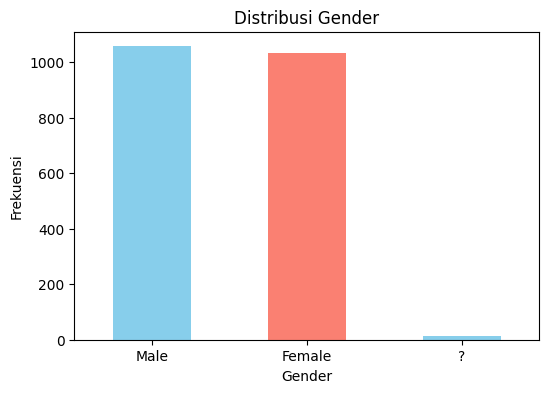

In [5]:
# 2. Tampilkan Visualisasi Data
# Visualisasi distribusi Gender
plt.figure(figsize=(6, 4))
data['Gender'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.show()

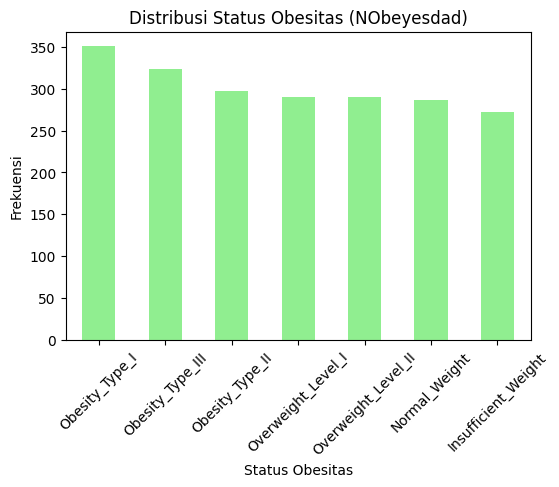

In [6]:
#2a. Visualisasi distribusi status obesitas (NObeyesdad)
plt.figure(figsize=(6, 4))
data['NObeyesdad'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribusi Status Obesitas (NObeyesdad)')
plt.xlabel('Status Obesitas')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

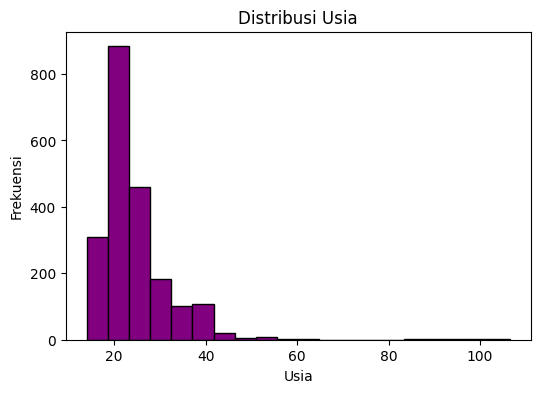

In [7]:
#2b. Visualisasi distribusi usia (Age)
plt.figure(figsize=(6, 4))
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')  # Convert Age to numeric
data['Age'].dropna().plot(kind='hist', bins=20, color='purple', edgecolor='black')
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()


In [8]:
# 3. Cek keberadaan missing values, unique value, data duplikat, keseimbangan data, dan deteksi outlier menggunakan boxplot

# Cek missing values
print("\nJumlah missing values per kolom:")
print(data.isnull().sum())

# Cek unique values per kolom
print("\nJumlah unique values per kolom:")
print(data.nunique())

# Cek duplikasi data
duplicates = data.duplicated().sum()
print(f"\nJumlah data duplikat: {duplicates}")

# Cek keseimbangan data (misal untuk NObeyesdad)
print("\nDistribusi NObeyesdad:")
print(data['NObeyesdad'].value_counts())


Jumlah missing values per kolom:
Age                               22
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Jumlah unique values per kolom:
Age                               1393
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP               

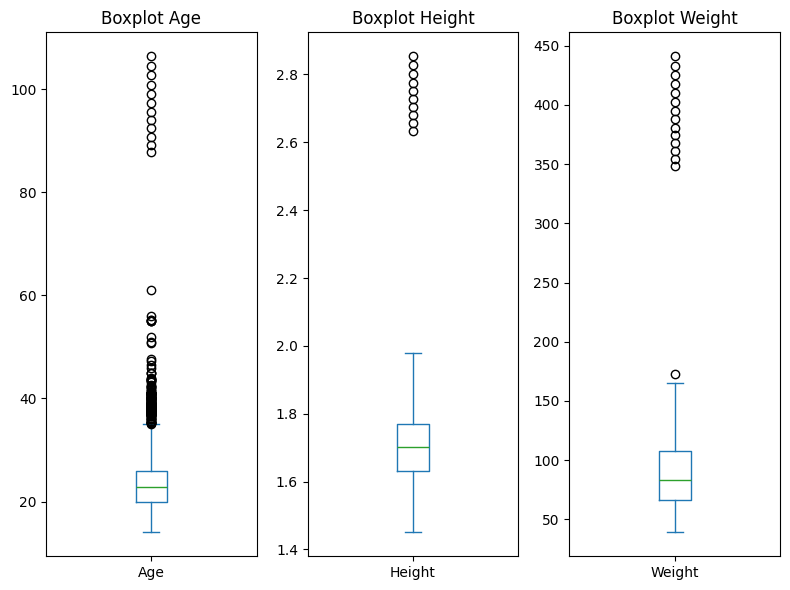

In [9]:
#3a Deteksi outlier menggunakan boxplot untuk variabel numerik
numeric_cols = ['Age', 'Height', 'Weight']
plt.figure(figsize=(8, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric
    data[col].dropna().plot(kind='box')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

Berdasarkan hasil EDA yang telah dilakukan, dapat disimpulkan beberapa hal penting terkait dataset ini:

1. Kondisi Data
Terdapat beberapa missing value di berbagai kolom seperti Age, Height, Weight, dan lainnya. Selain itu, ditemukan 18 data duplikat yang sebaiknya dihapus. Pada kolom Gender juga ditemukan nilai yang tidak valid ('?'), sehingga perlu dibersihkan sebelum analisis lebih lanjut.

2. Distribusi Data
Distribusi jenis kelamin cukup seimbang antara laki-laki dan perempuan, namun ada sedikit data yang tidak valid. Distribusi status obesitas (NObeyesdad) terbilang cukup merata, sehingga tidak ada masalah imbalance class yang berarti. Distribusi usia condong ke kelompok usia muda (sekitar 20-an tahun), dan terlihat adanya skew ke kanan dengan beberapa outlier di usia lanjut.

3. Outlier
Dari hasil boxplot, ditemukan banyak outlier terutama pada kolom Age, Height, dan Weight. Beberapa nilai ekstrem, seperti berat badan lebih dari 400 kg dan tinggi badan di atas 2.6 meter, terlihat tidak wajar dan kemungkinan besar merupakan data yang salah.

4. Jumlah Nilai Unik
Sebagian besar kolom kategorikal memiliki jumlah nilai unik yang masuk akal. Untuk kolom numerik seperti TUE, FAF, dan CH2O, terdapat variasi yang cukup tinggi dan ini bisa menjadi fitur yang berguna dalam proses pemodelan.

5. Kesimpulan Akhir
Secara umum, dataset ini sudah cukup baik untuk digunakan dalam analisis klasifikasi status obesitas. Namun, sebelum digunakan untuk modeling, perlu dilakukan pembersihan data terlebih dahulu: menangani missing value, menghapus duplikat, memperbaiki nilai yang tidak valid, dan menangani outlier. Kondisi distribusi kelas target yang cukup seimbang menjadi nilai tambah dalam membangun model klasifikasi yang stabil dan adil.

# PreProcessing Data

In [10]:
#1. Tangani Missing Values
print("Missing values sebelum penanganan:")
print(data.isnull().sum())
data = data.dropna()  # Menghapus baris dengan nilai kosong
print("Missing values setelah penanganan:")
print(data.isnull().sum())

Missing values sebelum penanganan:
Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64
Missing values setelah penanganan:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0


In [11]:
#2. Tangani Duplikasi
print(f"Jumlah data sebelum menghapus duplikat: {data.shape[0]}")
data = data.drop_duplicates()
print(f"Jumlah data setelah menghapus duplikat: {data.shape[0]}")

Jumlah data sebelum menghapus duplikat: 1935
Jumlah data setelah menghapus duplikat: 1917


Data setelah menghapus outlier:
(1723, 17)


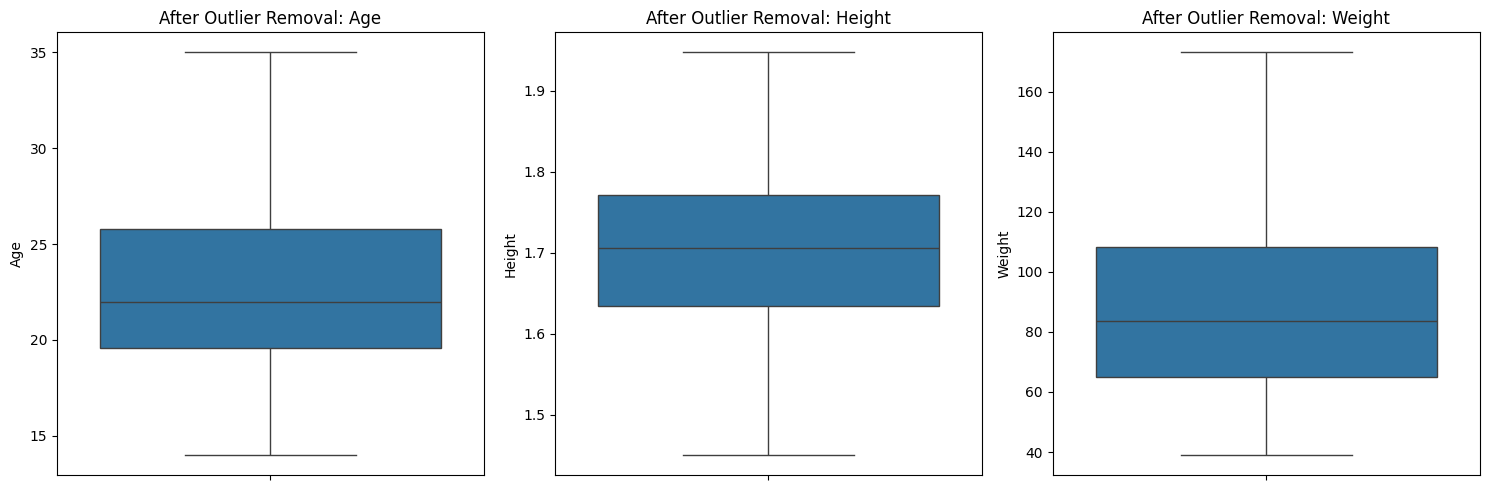

In [14]:
# 3. Tangani Outlier (menggunakan IQR untuk kolom numerik)
numeric_cols_for_outliers = ['Age', 'Height', 'Weight']
for col in numeric_cols_for_outliers:
    # Convert to numeric, coercing errors to NaN
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna(subset=numeric_cols_for_outliers)
#Tangani Outlier (menggunakan IQR untuk kolom numerik)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Apply outlier removal only after ensuring columns are numeric
for col in numeric_cols_for_outliers:
    data = remove_outliers(data, col)

print("Data setelah menghapus outlier:")
print(data.shape)

# Visualisasi setelah menghapus outlier
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Age', 'Height', 'Weight']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(f'After Outlier Removal: {col}')
plt.tight_layout()
plt.show()

In [15]:
#4. Ubah Data Kategori Menjadi Numerik
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    if column != 'NObeyesdad':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Encode target label
target_encoder = LabelEncoder()
data['NObeyesdad'] = target_encoder.fit_transform(data['NObeyesdad'])

In [16]:
# 5. Cek semua fitur
print("Semua fitur tersedia:", list(data.columns))

Semua fitur tersedia: ['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS', 'NObeyesdad']


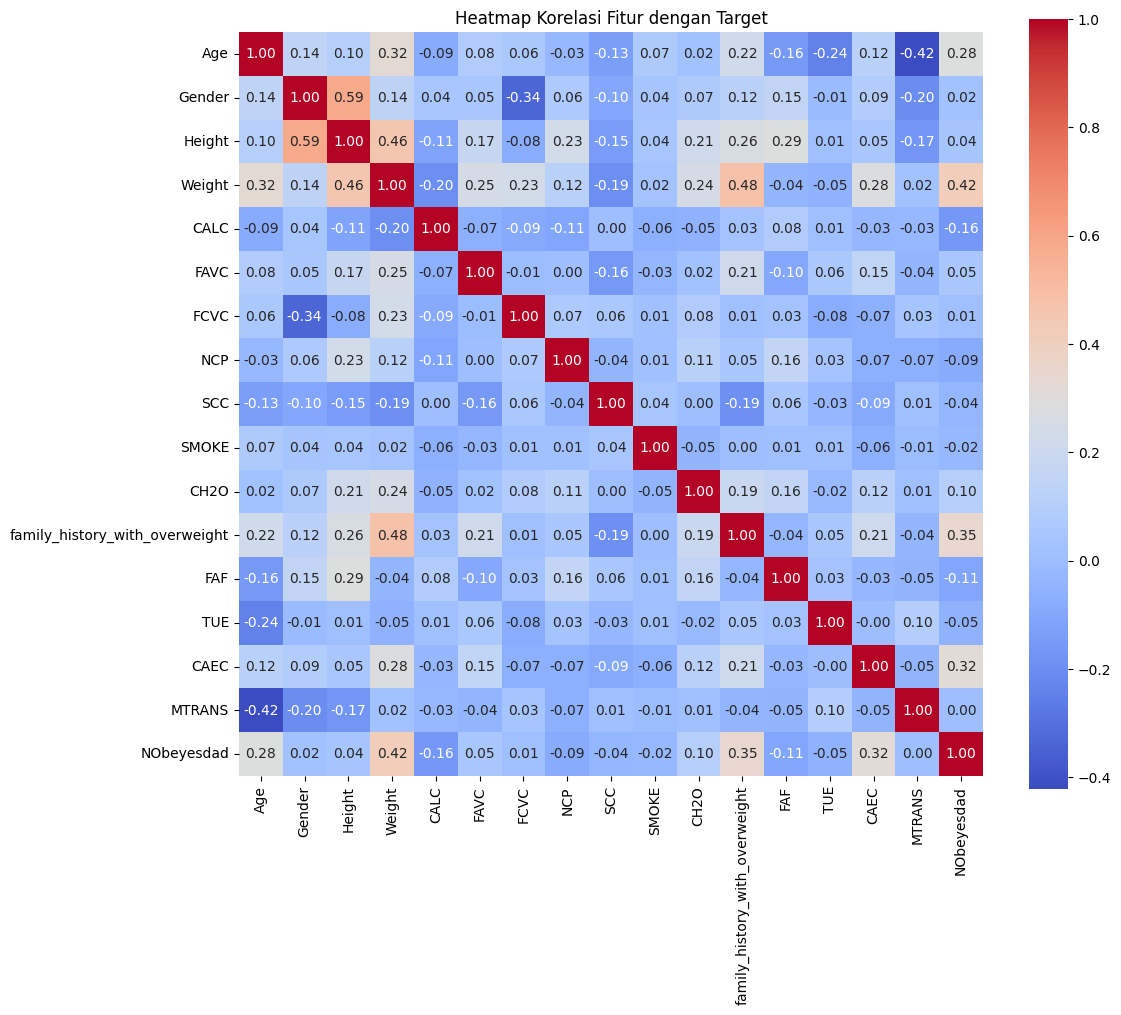

In [19]:
# Hitung matriks korelasi
correlation_matrix = data.corr()

# Tampilkan heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heatmap Korelasi Fitur dengan Target")
plt.show()

In [20]:
# 6. Pisahkan fitur dan target
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

In [21]:
# 7. Seleksi fitur berdasarkan korelasi
irrelevant_features = ['Gender', 'SCC', 'SMOKE', 'FAVC', 'FCVC', 'NCP', 'MTRANS']
X = X.drop(columns=irrelevant_features)

In [22]:
# 8. Atasi Ketidakseimbangan Kelas
print("Distribusi sebelum SMOTE:")
print(y.value_counts())
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Distribusi setelah SMOTE:")
print(y_resampled.value_counts())


Distribusi sebelum SMOTE:
NObeyesdad
4    291
2    259
1    254
0    242
3    235
5    229
6    213
Name: count, dtype: int64
Distribusi setelah SMOTE:
NObeyesdad
1    291
5    291
6    291
2    291
0    291
3    291
4    291
Name: count, dtype: int64


In [23]:
# 9. Normalisasi Data (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

## Kesimpulan Tahap Preprocessing Data

Pada tahap ini, dilakukan berbagai proses pembersihan dan transformasi data untuk memastikan bahwa data siap digunakan untuk pelatihan model machine learning. Adapun langkah-langkah yang telah dilakukan antara lain:

1. **Penghapusan missing values dan data duplikat**  
   Data yang memiliki nilai kosong maupun duplikat dihapus untuk menghindari bias dan kesalahan dalam proses pelatihan model.

2. **Penanganan outlier**  
   Outlier pada fitur numerik diidentifikasi dan dihapus menggunakan metode Interquartile Range (IQR), agar distribusi data menjadi lebih representatif.

3. **Konversi fitur kategorikal ke numerik**  
   Semua fitur kategorikal dikonversi menggunakan Label Encoding, agar dapat digunakan dalam model machine learning berbasis numerik.

4. **Seleksi fitur berdasarkan korelasi**  
   Dilakukan analisis korelasi antara fitur dan target (`NObeyesdad`) untuk mengidentifikasi fitur-fitur yang tidak memiliki hubungan signifikan. Fitur seperti `Gender`, `SMOKE`, `SCC`, `FAVC`, `FCVC`, `NCP`, dan `MTRANS` dihapus karena memiliki korelasi sangat rendah.

5. **Penanganan ketidakseimbangan kelas**  
   Dataset menunjukkan distribusi kelas yang tidak seimbang. Oleh karena itu, digunakan teknik Synthetic Minority Over-sampling Technique (SMOTE) untuk menyeimbangkan jumlah data pada masing-masing kelas target.

6. **Normalisasi fitur numerik**  
   Fitur numerik dinormalisasi menggunakan StandardScaler agar berada pada skala yang sama, sehingga membantu algoritma pembelajaran bekerja lebih optimal.

### Kesimpulan:
Setelah melalui tahapan preprocessing ini, dataset menjadi bersih, seimbang, dan siap digunakan untuk proses pelatihan model. Setiap langkah telah dilakukan untuk memaksimalkan kualitas data sehingga model dapat belajar secara efektif dan menghasilkan prediksi yang lebih akurat.
